In [1]:
#!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
# !pip install pandas-datareader
import pandas_datareader as data

In [2]:
df = yf.Ticker('AAPL')

In [3]:
df1 = pd.DataFrame(df.history(period='10y'))

In [4]:
df1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-03-25 00:00:00-04:00,14.333710,14.495960,14.243950,14.299472,501135600,0.0,0.0
2013-03-26 00:00:00-04:00,14.356850,14.369189,14.205399,14.224215,294294000,0.0,0.0
2013-03-27 00:00:00-04:00,14.079858,14.090345,13.903111,13.944753,331237200,0.0,0.0
2013-03-28 00:00:00-04:00,13.875038,13.936729,13.622103,13.654182,442839600,0.0,0.0
2013-04-01 00:00:00-04:00,13.630741,13.686264,13.193966,13.230055,389732000,0.0,0.0


In [5]:
df1.reset_index(inplace=True)

In [6]:
df1.drop(['Stock Splits','Dividends','Date'],axis='columns',inplace=True)
df1.head()


,Open,High,Low,Close,Volume
0,14.333710,14.495960,14.243950,14.299472,501135600
1,14.356850,14.369189,14.205399,14.224215,294294000
2,14.079858,14.090345,13.903111,13.944753,331237200
3,13.875038,13.936729,13.622103,13.654182,442839600
4,13.630741,13.686264,13.193966,13.230055,389732000


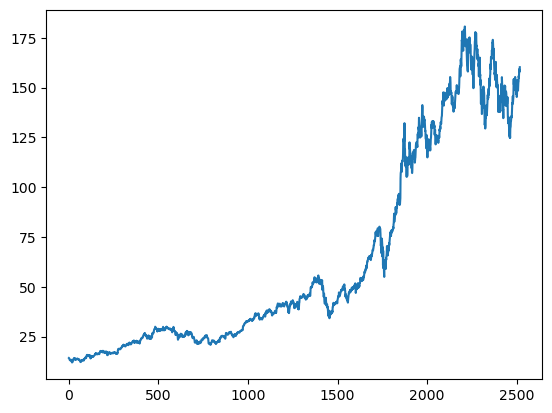

In [7]:
plt.plot(df1.Close)

## 100 days moving avg

In [8]:
ma100 = df1.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2514    144.036511
2515    144.110753
2516    144.200299
2517    144.346201
2518    144.396250
Name: Close, Length: 2519, dtype: float64

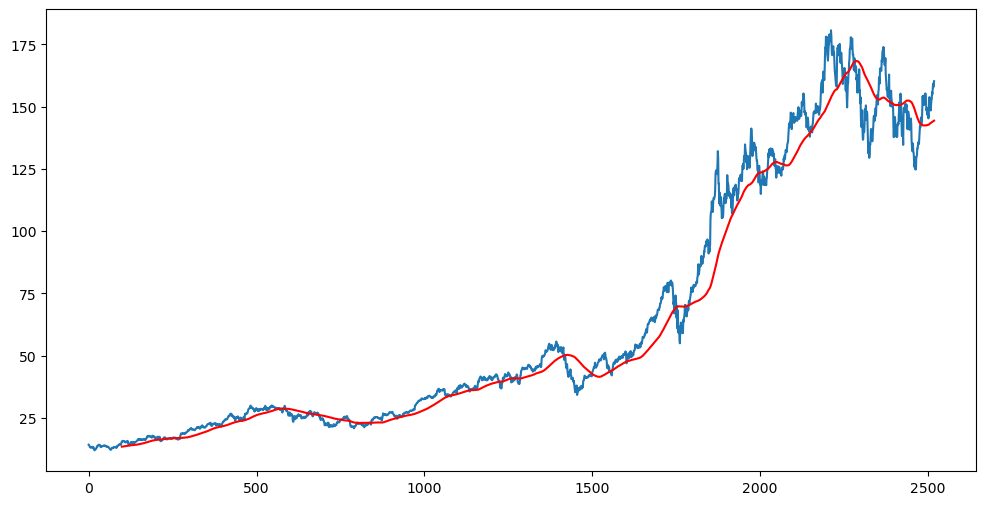

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df1.Close)
plt.plot(ma100,'r')
plt.show()

## 200  Days moving avg

In [10]:
ma200 = df1.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2514    147.341484
2515    147.385282
2516    147.450847
2517    147.518130
2518    147.579221
Name: Close, Length: 2519, dtype: float64

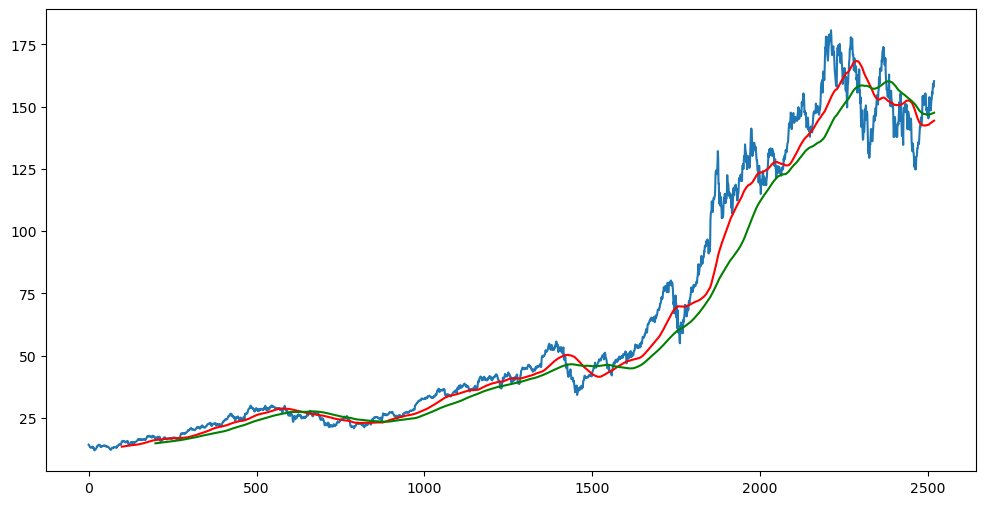

In [11]:
plt.figure(figsize=(12,6))

plt.plot(df1.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.show()

In [12]:
df1.shape

(2519, 5)

## Training Data

In [13]:
data_training =pd.DataFrame(df1['Close'][0:int(len(df1)*0.70)])
data_testing = pd.DataFrame(df1['Close'][int(len(df1)*0.70):int(len(df1))])

In [14]:
data_training.shape  , data_testing.shape

((1763, 1), (756, 1))

In [15]:
data_training.head() 

,Close
0,14.299472
1,14.224215
2,13.944753
3,13.654182
4,13.230055


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)

In [18]:
data_training_array.shape

(1763, 1)

### Y(Predection) or Y data depend on prev 100 Days data 

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train) , np.array(y_train)

In [20]:
x_train.shape

(1663, 100, 1)

In [21]:
y_train.shape

(1663,)

## ML Model

In [23]:
# !pip install keras

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.7/1.7 MB 11.1 MB/s eta 0:00:00


In [27]:
# !pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 272.8/272.8 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 225.5 kB/s eta 0:00:00
     ------------------------------------ 440.7/440.7 kB 152.2 kB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 11.3 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 10.5 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     --------------------------------

In [28]:
from keras.layers import Dense , Dropout, LSTM
from keras.models import Sequential

In [52]:
model = Sequential()
model.add(LSTM(units=50,activation ='relu',return_sequences= True,
              input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60,activation ='relu',return_sequences= True))
model.add(Dropout(0.3))



model.add(LSTM(units=80,activation ='relu',return_sequences= True))
model.add(Dropout(0.4))



model.add(LSTM(units=120,activation ='relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [54]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 14s 169ms/step - loss: 0.0341
Epoch 2/50
52/52 [==============================] - 9s 169ms/step - loss: 0.0080
Epoch 3/50
52/52 [==============================] - 9s 167ms/step - loss: 0.0055
Epoch 4/50
52/52 [==============================] - 9s 168ms/step - loss: 0.0046
Epoch 5/50
52/52 [==============================] - 9s 167ms/step - loss: 0.0047
Epoch 6/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0047
Epoch 7/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0040
Epoch 8/50
52/52 [==============================] - 9s 167ms/step - loss: 0.0035
Epoch 9/50
52/52 [==============================] - 9s 165ms/step - loss: 0.0035
Epoch 10/50
52/52 [==============================] - 9s 167ms/step - loss: 0.0042
Epoch 11/50
52/52 [==============================] - 9s 166ms/step - loss: 0.0034
Epoch 12/50
52/52 [==============================] - 9s 166ms/step - loss: 0.0035
Epoch 13/50
52/52 [=====

In [55]:
model.save('keras_model.h5')

In [56]:
data_testing.head()

,Close
1763,60.183426
1764,63.350460
1765,60.727612
1766,62.460651
1767,62.333183


### For predecting the 1763th Day data we need previous 100 Day data from training set

In [57]:
past_100_days = data_training.tail(100)

In [58]:
final_df = pd.concat([past_100_days,data_testing], ignore_index =  True)

In [59]:
final_df.head()

,Close
0,59.310192
1,60.651169
2,62.372505
3,62.782108
4,62.691895


#### Scale Down


In [60]:
input_data = scaler.fit_transform(final_df)

In [61]:
input_data.shape

(856, 1)

In [62]:
x_test =[]
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test , y_test =np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [63]:
y_predected =model.predict(x_test)

24/24 [==============================] - 2s 56ms/step


In [64]:
y_predected.shape

(756, 1)

In [65]:
scaler.scale_

array([0.00795641])

In [66]:
scale_factor = 1/0.00795641
y_predected = y_predected * scale_factor
y_test = y_test * scale_factor

In [67]:
y_predected

array([[ 17.536573 ],
       [ 16.872803 ],
       [ 16.25752  ],
       [ 15.713259 ],
       [ 15.255684 ],
       [ 14.890714 ],
       [ 14.604453 ],
       [ 14.367444 ],
       [ 14.157931 ],
       [ 13.972036 ],
       [ 13.812331 ],
       [ 13.683954 ],
       [ 13.592749 ],
       [ 13.544251 ],
       [ 13.546611 ],
       [ 13.60734  ],
       [ 13.731246 ],
       [ 13.91915  ],
       [ 14.165661 ],
       [ 14.457981 ],
       [ 14.782362 ],
       [ 15.1252775],
       [ 15.4767885],
       [ 15.829705 ],
       [ 16.175844 ],
       [ 16.512026 ],
       [ 16.842062 ],
       [ 17.16902  ],
       [ 17.497488 ],
       [ 17.834984 ],
       [ 18.190695 ],
       [ 18.571123 ],
       [ 18.987305 ],
       [ 19.453365 ],
       [ 19.973764 ],
       [ 20.541971 ],
       [ 21.14536  ],
       [ 21.762709 ],
       [ 22.379248 ],
       [ 22.98049  ],
       [ 23.560293 ],
       [ 24.11217  ],
       [ 24.631416 ],
       [ 25.111998 ],
       [ 25.548834 ],
       [ 2

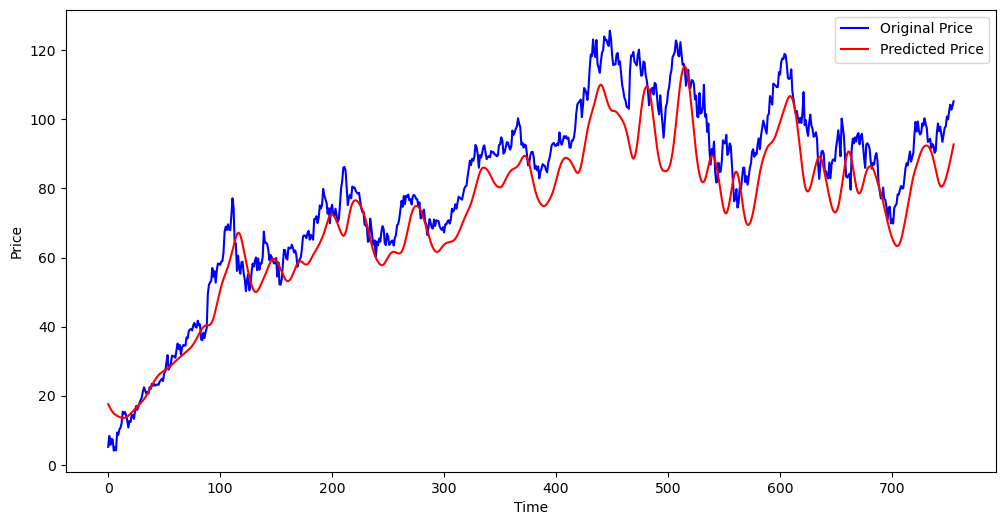

In [68]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predected, "r", label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()